# COVID19 Data Analysis



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [17]:
plt.style.use('ggplot')

In [39]:

import os
os.getcwd()

'C:\\Piton'

In [40]:
path=("C:\Piton")
os.chdir(path)

In [41]:
import pandas as pd
data=pd.read_csv("covid.csv")

In [166]:
dataset = pd.read_csv("covid.csv", sep=';', index_col=0)
dataset.index = pd.to_datetime(dataset.index, format='%d.%m.%Y') #dateleri zaman olarak tanımadığı için bu işlemi yaptık to date time tarihe çevirir.
dataset.head(10)

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-11,0,1,0,0,0,0
2020-03-12,0,0,0,0,0,0
2020-03-13,0,4,0,0,0,0
2020-03-14,0,0,0,0,0,0
2020-03-15,2800,1,0,0,0,0
2020-03-16,0,12,0,0,0,0
2020-03-17,0,29,0,0,0,1
2020-03-18,7197,51,0,0,0,0
2020-03-19,1981,94,0,0,0,2


In [167]:
type(dataset.index[0])

pandas._libs.tslibs.timestamps.Timestamp

(array([18336., 18343., 18353., 18360., 18367., 18374.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

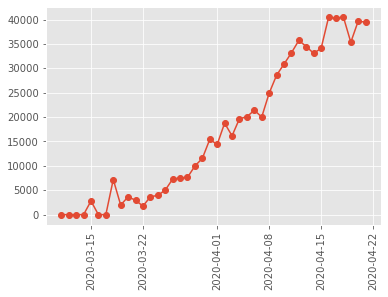

In [45]:
plt.plot(dataset.index.values,dataset.num_tests.values,marker="o")#tarihlere göre toplam yapılan test sayısının grafiğini çizdirdik
plt.xticks(rotation=90)#x eksenindeki tarihleri 90 derece döndürdük

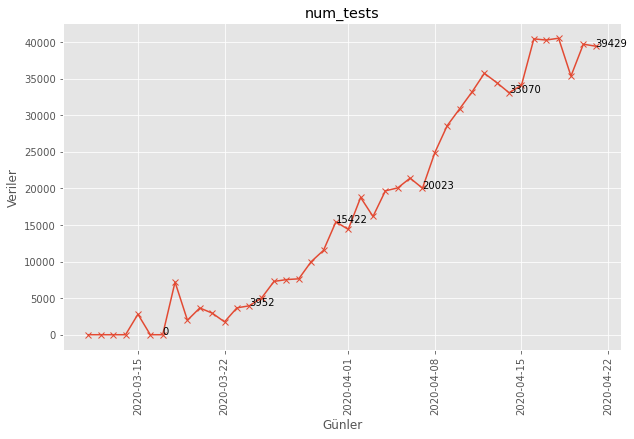

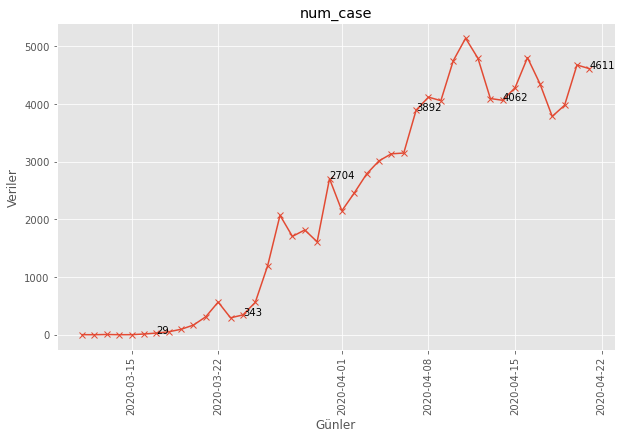

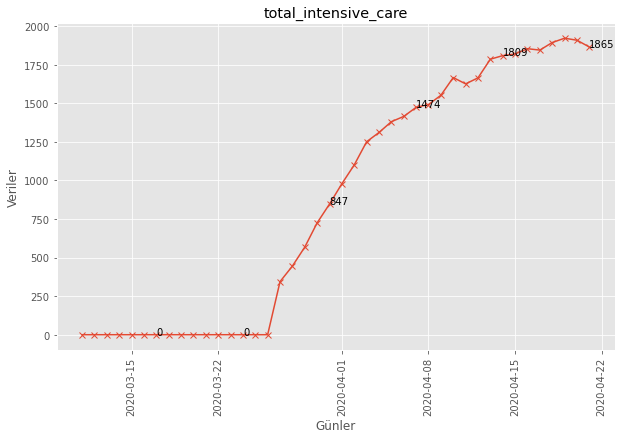

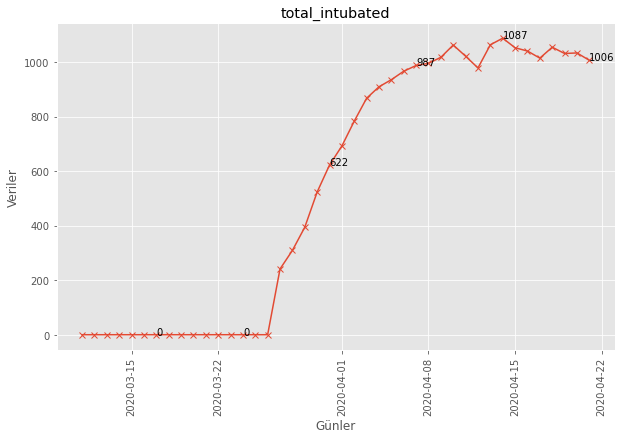

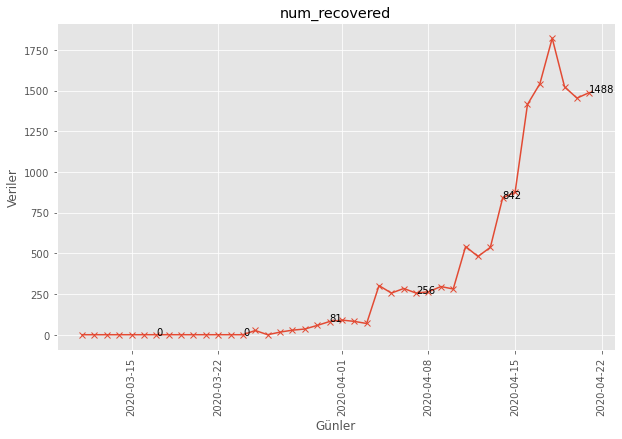

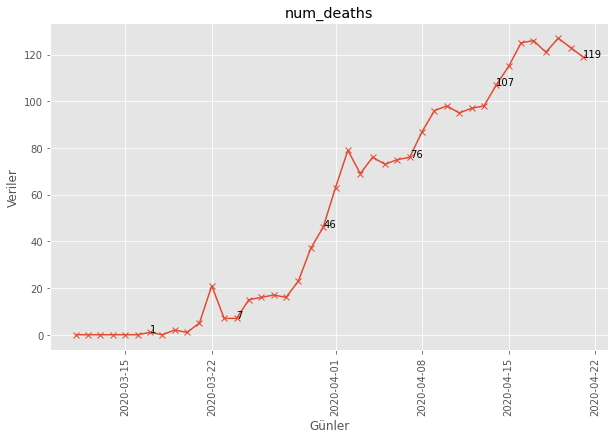

In [55]:
for i, col in enumerate(dataset.columns.tolist()): #enumarete sütunlar arasında dönücek
    plt.figure(figsize=(10, 6))
    x_axis = dataset.index.values
    y_axis = dataset[col].values
    plt.plot(x_axis, y_axis, label=col,marker='x')
    plt.title(col)
    plt.xlabel("Günler")
    plt.ylabel("Veriler")
    plt.xticks(rotation=90)
    counter=0
    for j , k in zip(x_axis,y_axis):#iki değerin kombinasyonunu getirir
        counter+=1
        if counter %7==0: #her 7 günde bir olan değerleri grafiğe yazıcak
            plt.annotate(str(k),xy=(j,k))
       

In [25]:
# ilk 8 günün verisi öngörülebilir olmadığı için öteleyelim
dataset_shifted = dataset.iloc[9:,:] # bütün sütunları al  ilk 8 satırı alma
dataset_shifted.head()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-20,3656,167,0,0,0,1
2020-03-21,2953,311,0,0,0,5
2020-03-22,1758,566,0,0,0,21
2020-03-23,3672,293,0,0,0,7
2020-03-24,3952,343,0,0,0,7


In [26]:
# About Data.
dataset_shifted.describe()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21255.484848,2890.878788,1107.484848,687.303030,452.848485,68.363636
std,13421.055955,1595.323728,724.413518,424.414559,571.175275,43.126136
min,1758.000000,167.000000,0.000000,0.000000,0.000000,1.000000
25%,7641.000000,1704.000000,445.000000,309.000000,28.000000,21.000000
50%,20023.000000,3135.000000,1381.000000,935.000000,256.000000,76.000000
75%,34090.000000,4117.000000,1786.000000,1021.000000,542.000000,98.000000
max,40520.000000,5138.000000,1922.000000,1087.000000,1822.000000,127.000000


In [27]:
scaler = MinMaxScaler() #normalizasyon verileri o sütundaki minimum dan çıkar / o sütundaki max-minimum yani veriler 0 ile 1 arasında ölçeklendirilmiş olur
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_shifted.values)

In [58]:
dataset_scaled=pd.DataFrame(dataset_scaled,columns=dataset.columns)
dataset_scaled.index=dataset_shifted.index #date sütununun tarih olarak gelmesi için yaptık yoksa 1,2,3,4,5, olarak gözüküyor
dataset_scaled

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-20,0.048965,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-21,0.030829,0.028968,0.000000,0.000000,0.000000,0.031746
2020-03-22,0.000000,0.080266,0.000000,0.000000,0.000000,0.158730
2020-03-23,0.049378,0.025347,0.000000,0.000000,0.000000,0.047619
2020-03-24,0.056602,0.035405,0.000000,0.000000,0.000000,0.047619
2020-03-25,0.084542,0.079260,0.000000,0.000000,0.014270,0.111111
2020-03-26,0.142614,0.207001,0.000000,0.000000,0.000000,0.119048
2020-03-27,0.148986,0.382619,0.178980,0.221711,0.008782,0.126984
2020-03-28,0.151772,0.309193,0.231530,0.284269,0.015368,0.119048


In [59]:
corr = dataset_scaled.corr() 
corr

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
num_tests,1.000000,0.939266,0.956330,0.899342,0.854870,0.973720
num_case,0.939266,1.000000,0.958863,0.946025,0.673708,0.931931
total_intensive_care,0.956330,0.958863,1.000000,0.984560,0.745196,0.977441
total_intubated,0.899342,0.946025,0.984560,1.000000,0.629068,0.939364
num_recovered,0.854870,0.673708,0.745196,0.629068,1.000000,0.820568
num_deaths,0.973720,0.931931,0.977441,0.939364,0.820568,1.000000


<AxesSubplot:>

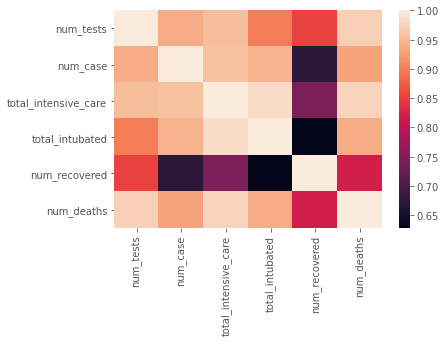

In [29]:
heatmap(corr,
        xticklabels=dataset_shifted.columns,
        yticklabels=dataset_shifted.columns)


num_case ile num_recovered girdi değişkeni, num_intube, num_yogun_bakim ise çıktı değişkeni olarak alınmıştır.

In [60]:
X = dataset_scaled.iloc[:, [1,4]] #tüm satır , sütunlarda vaka sayısı iyileşen sayısı girdi olarak 
y = dataset_scaled.iloc[:,[2,3]] #tüm satır, yoğun bakım hasta saysııs ve entübe olan hasta sayısı çıktı değişkeni olarak 

In [61]:
X

,num_case,num_recovered
date,,
2020-03-20,0.000000,0.000000
2020-03-21,0.028968,0.000000
2020-03-22,0.080266,0.000000
2020-03-23,0.025347,0.000000
2020-03-24,0.035405,0.000000
2020-03-25,0.079260,0.014270
2020-03-26,0.207001,0.000000
2020-03-27,0.382619,0.008782
2020-03-28,0.309193,0.015368


In [63]:
y

,total_intensive_care,total_intubated
date,,
2020-03-20,0.000000,0.000000
2020-03-21,0.000000,0.000000
2020-03-22,0.000000,0.000000
2020-03-23,0.000000,0.000000
2020-03-24,0.000000,0.000000
2020-03-25,0.000000,0.000000
2020-03-26,0.000000,0.000000
2020-03-27,0.178980,0.221711
2020-03-28,0.231530,0.284269


In [32]:
lr = LinearRegression()
lr.fit(X.values, y.values)
y_predicted_lr = lr.predict(X.values)
print(mean_squared_error(y.values, y_predicted_lr))
print(r2_score(y.values, y_predicted_lr))

0.012063532495168398
0.9162630883651932


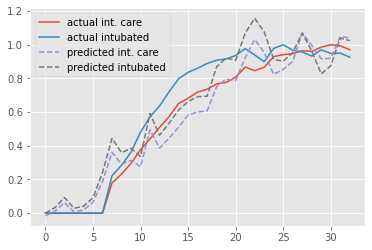

In [33]:
%matplotlib inline
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_lr,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['actual int. care','actual intubated','predicted int. care','predicted intubated'])

plt.plot(dataset_shifted.index.values, y.values, label='actual')
plt.plot(dataset_shifted.index.values, y_predicted_lr, label='predict')
plt.xticks(pd.date_range(dataset.index.values[0],
                         dataset.index.values[-1],
                         freq='W'),
           rotation=90)
plt.title('LR Model')
plt.xlabel('Day')
plt.ylabel('Number of deaths')
plt.legend()
#plt.savefig("outputs/lr.png")

In [151]:
mlp = MLPRegressor(hidden_layer_sizes=(75),max_iter=100000,learning_rate_init=0.05,random_state=42)
mlp.fit(X.values, y.values)#x değerlerini al y değerlerine dönüştür

#hidden layer size kaç tane katmandan oluşacağı katmanda kaç tane sinir hücresi olucağı 75 tane sinir hücresinden bir katman oluşturduk
#max it kaç tane iterasyon yapacak

MLPRegressor(hidden_layer_sizes=75, learning_rate_init=0.05, max_iter=100000,
             random_state=42)

In [152]:
y_predicted = mlp.predict(X.values)

In [153]:
y_predicted #tahmin edilen değer

array([[-0.05704642, -0.08922999],
       [-0.02844771, -0.053589  ],
       [ 0.02219585,  0.00952525],
       [-0.03202255, -0.05804413],
       [-0.02209244, -0.04566878],
       [ 0.04871273,  0.05122549],
       [ 0.14749413,  0.16555758],
       [ 0.34710418,  0.41533857],
       [ 0.28257235,  0.34018217],
       [ 0.31337536,  0.38028147],
       [ 0.29423264,  0.36458569],
       [ 0.55086014,  0.68738737],
       [ 0.44242928,  0.55722691],
       [ 0.49929512,  0.62438911],
       [ 0.55552127,  0.68908944],
       [ 0.6590556 ,  0.79570658],
       [ 0.66957281,  0.80903302],
       [ 0.67493436,  0.81078434],
       [ 0.77162126,  0.89459649],
       [ 0.80298386,  0.92010872],
       [ 0.79888532,  0.91353612],
       [ 0.89078768,  0.99012984],
       [ 0.97915379,  1.03295267],
       [ 0.92338901,  0.99458762],
       [ 0.83605249,  0.91793058],
       [ 0.87066569,  0.91108302],
       [ 0.90457975,  0.93461003],
       [ 1.04037561,  0.98083254],
       [ 0.99596115,

In [154]:
y.values #gerçek değer

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.17898023, 0.22171113],
       [0.23152966, 0.28426863],
       [0.29552549, 0.3624655 ],
       [0.37721124, 0.48114075],
       [0.44068678, 0.57221711],
       [0.50936524, 0.63661454],
       [0.57284079, 0.72033119],
       [0.6508845 , 0.7976081 ],
       [0.68210198, 0.83624655],
       [0.71852237, 0.86016559],
       [0.73621228, 0.88868445],
       [0.76690947, 0.90800368],
       [0.77627471, 0.91536339],
       [0.8074922 , 0.93560258],
       [0.8673257 , 0.97700092],
       [0.84599376, 0.93928243],
       [0.86628512, 0.89972401],
       [0.92924037, 0.97792088],
       [0.94120708, 1.        ],
       [0.94693028, 0.96780129],
       [0.96462019, 0.95676173],
       [0.95993757, 0.93284269],
       [0.98543184, 0.96964121],
       [1.

In [155]:
mean_squared_error(y.values,y_predicted) #toplam karesel hata

0.005340620984241113

In [156]:
r2_score(y.values,y_predicted)

0.9626789187506493

In [157]:
mlp.coefs_ #regresyonda kullanılan ağırlıklar

[array([[-5.48255014e-01,  2.58244019e-01,  3.82422973e-03,
         -1.57329762e-01, -3.87535128e-01,  6.71223425e-03,
         -5.25820755e-01, -1.61973612e-01,  4.17142910e-04,
         -1.78354980e-01, -2.08662132e-01,  4.91808772e-01,
          3.23887984e-01, -2.35625403e-01,  6.09420455e-03,
         -2.64965275e-01, -3.28030114e-03,  1.60082823e-04,
         -8.82998284e-04, -1.34204023e-01,  2.17501002e-01,
          6.08808500e-03, -3.46571749e-01,  2.69369560e-03,
         -8.76463236e-02, -2.69327828e-03, -6.97834780e-02,
          2.99209335e-04, -2.88594710e-01, -5.28720930e-03,
         -3.75162559e-04,  6.61035567e-03, -5.66518136e-01,
          1.32782832e-01, -3.95531275e-02,  2.41149737e-01,
         -4.25684089e-01, -5.23808141e-01,  8.84117834e-02,
         -3.44306278e-05,  4.68396370e-03, -5.45044456e-01,
         -4.86939658e-01, -5.21238737e-02, -3.08347040e-03,
          1.43706504e-01, -4.13850374e-01, -3.28478845e-01,
          1.59934966e-01, -6.10968254e-0

In [159]:
mlp.coefs_[0].round(2)#birinci için w11=-0.55

array([[-0.55,  0.26,  0.  , -0.16, -0.39,  0.01, -0.53, -0.16,  0.  ,
        -0.18, -0.21,  0.49,  0.32, -0.24,  0.01, -0.26, -0.  ,  0.  ,
        -0.  , -0.13,  0.22,  0.01, -0.35,  0.  , -0.09, -0.  , -0.07,
         0.  , -0.29, -0.01, -0.  ,  0.01, -0.57,  0.13, -0.04,  0.24,
        -0.43, -0.52,  0.09, -0.  ,  0.  , -0.55, -0.49, -0.05, -0.  ,
         0.14, -0.41, -0.33,  0.16, -0.61,  0.4 ,  0.02, -0.08,  0.2 ,
        -0.25,  0.  ,  0.  , -0.24, -0.01, -0.  , -0.33, -0.42,  0.26,
         0.  , -0.42, -0.27, -0.19,  0.12, -0.46,  0.4 ,  0.19, -0.43,
        -0.01, -0.12,  0.  ],
       [-0.16, -0.09, -0.  , -0.27, -0.86, -0.01, -0.21, -0.48, -0.  ,
        -0.41, -0.21,  0.35,  0.3 ,  0.17,  0.  , -0.35,  0.  ,  0.  ,
         0.  ,  0.18,  0.16,  0.  , -0.  , -0.01, -0.35, -0.01,  0.31,
        -0.  , -0.32, -0.  , -0.  , -0.  , -0.14, -0.31, -0.53, -0.25,
        -0.49, -0.06, -0.04, -0.  , -0.01, -0.33, -1.46, -0.08, -0.  ,
         0.19, -0.1 , -0.45, -0.03, -0.22,  0.1

In [158]:
mlp.coefs_[1].round(2) #w2=0.12

array([[ 0.12,  0.33],
       [ 0.25,  0.23],
       [-0.  , -0.  ],
       [-0.18, -0.13],
       [-0.19, -0.6 ],
       [ 0.  , -0.  ],
       [-0.06, -0.36],
       [ 0.11,  0.43],
       [ 0.01, -0.  ],
       [ 0.16, -0.14],
       [ 0.17, -0.2 ],
       [ 0.43,  0.37],
       [ 0.27,  0.01],
       [ 0.19,  0.37],
       [-0.  ,  0.01],
       [-0.28, -0.29],
       [ 0.  ,  0.  ],
       [ 0.  , -0.  ],
       [ 0.01,  0.01],
       [-0.03, -0.11],
       [ 0.17,  0.11],
       [ 0.  ,  0.  ],
       [ 0.15, -0.1 ],
       [-0.01, -0.01],
       [-0.08, -0.22],
       [-0.  , -0.  ],
       [-0.14, -0.21],
       [-0.  , -0.  ],
       [ 0.09, -0.02],
       [ 0.  ,  0.  ],
       [-0.01,  0.  ],
       [-0.  , -0.  ],
       [ 0.04, -0.49],
       [-0.02,  0.32],
       [ 0.22,  0.09],
       [ 0.1 ,  0.16],
       [ 0.  , -0.24],
       [ 0.07,  0.05],
       [ 0.06,  0.05],
       [-0.  ,  0.  ],
       [ 0.01,  0.  ],
       [ 0.17,  0.28],
       [-0.43, -0.69],
       [ 0.

In [160]:
mlp.intercepts_#75 tane katsayıdan b11=-0.34 b21 değeri=0.49


[array([-0.34807287,  0.07209708, -0.19825183, -0.3492062 ,  0.26917149,
        -0.1440081 , -0.0348794 , -0.32757356, -0.14647447, -0.04303863,
        -0.32960869,  0.15420971,  0.09536544, -0.45808058, -0.22873734,
        -0.12571818, -0.10005679, -0.17501375, -0.25638089, -0.25291298,
         0.07601236, -0.26988444, -0.29275101, -0.15269482, -0.10872383,
        -0.18179814, -0.07120347, -0.06323458, -0.12159667, -0.20236862,
        -0.08873115, -0.21579407, -0.10134007,  0.1360771 , -0.434648  ,
        -0.07260023, -0.13292528, -0.26869212, -0.18669255, -0.14412142,
        -0.22716687, -0.3873794 ,  0.36643258, -0.12961531, -0.08986814,
        -0.1490529 , -0.08988312, -0.14051884,  0.15220766, -0.33003645,
         0.08547389, -0.37202145, -0.50934092,  0.16347067, -0.20728203,
        -0.27401064, -0.22249466,  0.24160835, -0.27631943, -0.18936765,
        -0.29860145, -0.05992743, -0.05214584, -0.15393783, -0.07734605,
        -0.4461963 , -0.45719702, -0.03583762, -0.1

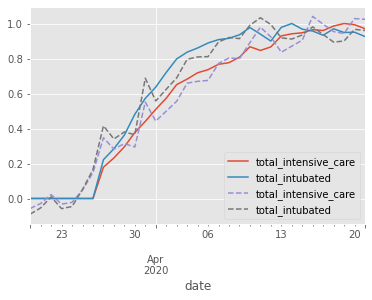

In [165]:
ax=y.plot(linestyle="-")
pd.DataFrame(y_predicted,columns=y.columns,index=y.index).plot(ax=ax,linestyle="--")
plt.legend()#sürekli çizgiler gerçek değerler kesikli çizgiler tahmin ettiğimiz değerler %96 başarı oranında tahmin edildi 

In [35]:
# Model evaluation
r2_mlp = r2_score(y.values, y_predicted_mlp)
print("mean_squared_error: ", mean_squared_error(y.values, y_predicted_mlp))
print("r2_score: ", r2_score(y.values, y_predicted_mlp))

mean_squared_error:  0.03180301954828772
r2_score:  0.779077654223195


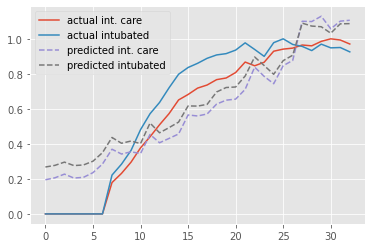

In [36]:
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_mlp,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['actual int. care','actual intubated','predicted int. care','predicted intubated'])